In [6]:
using Plots
using NetCDF: ncread, ncwrite, nccreate
using Statistics: mean

ncfile = "/home/ajaruga/clones/ClimateMachine.jl/output/testing_dycoms_master/DYCOMS_AtmosLESDefault_2020-11-19T22.08.45.979.nc";

In [7]:
z = ncread(ncfile, "z")
t = ncread(ncfile, "time")

vars = ["w", "qt", "ql", "qi", "temp", "rho", "time", "lwp", "rwp", "qr"]

data = Dict(var => [] for var in vars)
for var in vars
    temp = ncread(ncfile, var)
    temp = reshape(temp, (1, size(temp)...))
    push!(data[var], temp)
end
data = Dict(var => vcat(data[var]...) for var in vars)

Dict{String,Array{Float64,N} where N} with 10 entries:
  "lwp"  => [0.171145 0.150733 … 0.113243 0.120514]
  "qi"   => [0.0 0.0 … 0.0 0.0]…
  "w"    => [0.0 0.0 … 0.0 0.0]…
  "time" => [0.0 1800.05 … 12600.3 14400.0]
  "qt"   => [0.009 0.009 … 0.0015 0.0015]…
  "qr"   => [0.0 0.0 … 0.0 0.0]…
  "temp" => [289.007 288.856 … 290.828 290.753]…
  "ql"   => [0.0 0.0 … 0.0 0.0]…
  "rwp"  => [0.0 0.00355653 … 0.00354871 0.00422402]
  "rho"  => [1.21493 1.21363 … 1.01914 1.01777]…

In [8]:
sim_time = data["time"] / 60

print(length(sim_time))

f1 = 1
f2 = 3
f3 = 6
f4 = 9

print("\n")
print(sim_time[f1], "\n", sim_time[f2], "\n", sim_time[f3], "\n", sim_time[f4])

9
0.0
60.00164658738491
150.0041164688583
240.00000000059873

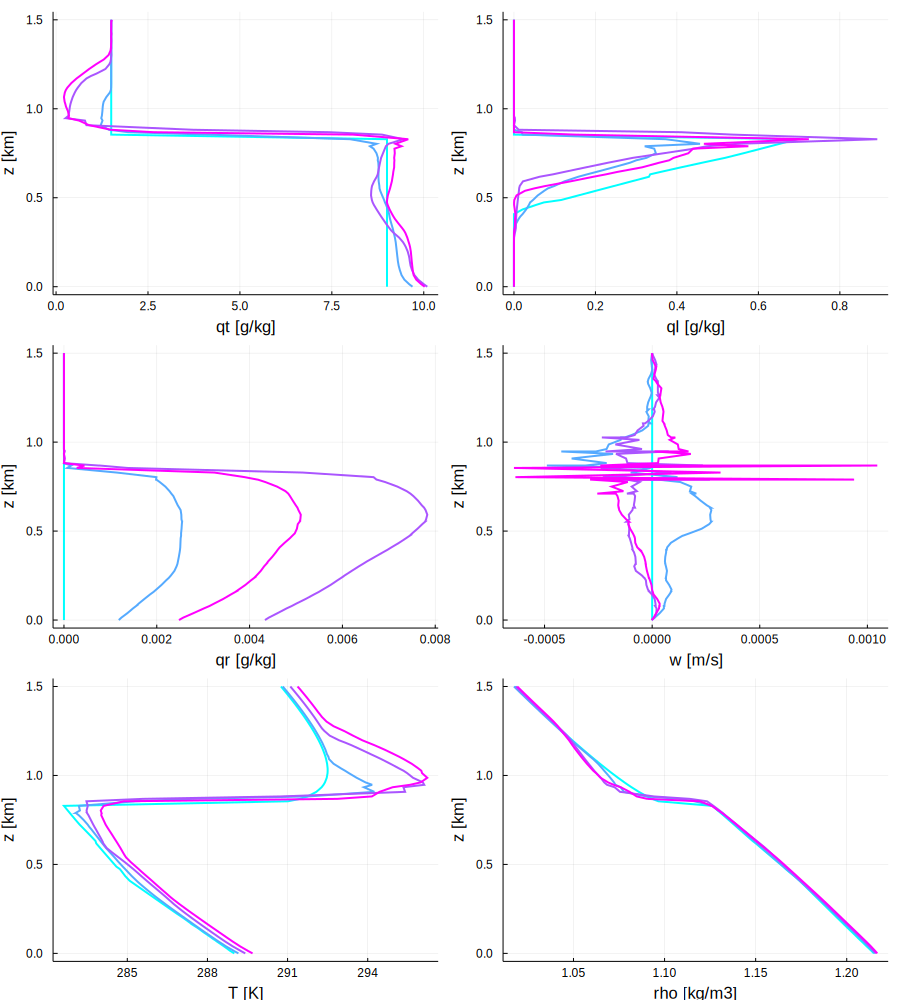

In [9]:
## Plot profiles

data_1 = [data["qt"][1,:,f1],   data["qt"][1,:,f2],   data["qt"][1,:,f3],   data["qt"][1,:,f4]]
data_2 = [data["ql"][1,:,f1],   data["ql"][1,:,f2],   data["ql"][1,:,f3],   data["ql"][1,:,f4]]
data_3 = [data["qr"][1,:,f1],   data["qr"][1,:,f2],   data["qr"][1,:,f3],   data["qr"][1,:,f4]]
data_4 = [data["w"][1,:,f1],    data["w"][1,:,f2],    data["w"][1,:,f3],    data["w"][1,:,f4]]
data_5 = [data["temp"][1,:,f1], data["temp"][1,:,f2], data["temp"][1,:,f3], data["temp"][1,:,f4]]
data_6 = [data["rho"][1,:,f1],  data["rho"][1,:,f2],  data["rho"][1,:,f3],  data["rho"][1,:,f4]]

z_arr = [z, z, z, z] * 1e-3

n=4
CList = reshape( range(colorant"cyan", stop=colorant"magenta",length=n), 1, n );

p1 = plot(data_1 * 1e3, z_arr, xlabel="qt [g/kg]",   ylabel="z [km]", linecolor=CList)
p2 = plot(data_2 * 1e3, z_arr, xlabel="ql [g/kg]",   ylabel="z [km]", linecolor=CList)
p3 = plot(data_3 * 1e3, z_arr, xlabel="qr [g/kg]",   ylabel="z [km]", linecolor=CList)
p4 = plot(data_4,       z_arr, xlabel="w [m/s]",     ylabel="z [km]", linecolor=CList)
p5 = plot(data_5,       z_arr, xlabel="T [K]",       ylabel="z [km]", linecolor=CList)
p6 = plot(data_6,       z_arr, xlabel="rho [kg/m3]", ylabel="z [km]", linecolor=CList)

fig = plot(p1, p2, p3, p4, p5, p6, layout=(3, 2), size=(900, 1000), lw=2, legend = false)

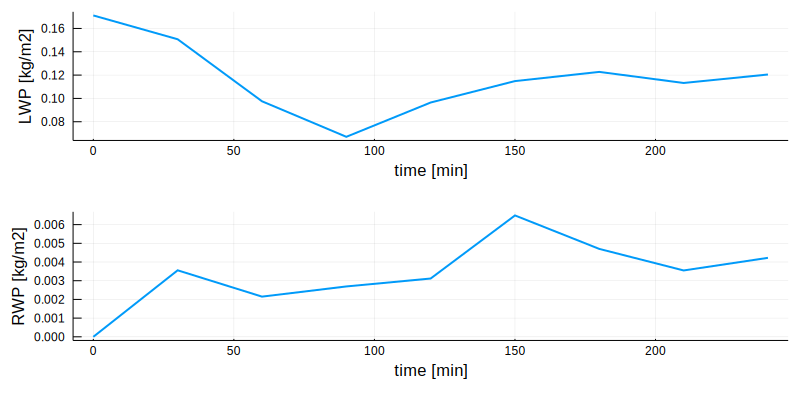

In [10]:
## Plot LWP and RWP timeseries

p1 = plot(data["time"][:]/60, data["lwp"][:], xlabel="time [min]", ylabel="LWP [kg/m2]")
p2 = plot(data["time"][:]/60, data["rwp"][:], xlabel="time [min]", ylabel="RWP [kg/m2]")

fig = plot(p1, p2, layout=(2, 1), size=(800, 400), lw=2, legend = false)